In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output

In [3]:
update_rate = 60  # sec

In [4]:
def load_and_plot(load_path_list, name_list):
    fig, axes = plt.subplots(2 * len(name_list), 1)
    
    for i, load_path in enumerate(load_path_list):
        name = name_list[i]
        mean_pix_acc_miou_log = list()

        with open(load_path, "r") as load_file:
            for line in load_file:
                key_value = line.split(", ")
                iter_cnt = int(key_value[0][17:])
                mean_pix_acc = float(key_value[1][15:])
                miou = float(key_value[2][12:])

                mean_pix_acc_miou_log.append([iter_cnt, mean_pix_acc, miou])

        max_pixel_acc = np.asarray(mean_pix_acc_miou_log)[:, 1].max()
        argmax_pixel_acc = np.argmax(np.asarray(mean_pix_acc_miou_log)[:, 1])

        max_miou = np.asarray(mean_pix_acc_miou_log)[:, 2].max()
        argmax_miou = np.argmax(np.asarray(mean_pix_acc_miou_log)[:, 2])
        min_iter = np.asarray(mean_pix_acc_miou_log)[:, 0].min()

        axes[i * 2].scatter(np.asarray(mean_pix_acc_miou_log)[:, 0], np.asarray(mean_pix_acc_miou_log)[:, 1],
                        s=15)
        axes[i * 2].scatter(np.asarray(mean_pix_acc_miou_log)[argmax_pixel_acc, 0], max_pixel_acc, s=15, c='r')
        axes[i * 2].set_ylim(0, 1)
        axes[i * 2].set_title(name + "\nmean pixel accuracy", fontsize=20, c=color_list[i])
        axes[i * 2].grid()
        axes[i * 2].axhline(y=max_pixel_acc, color='r', linestyle='-', linewidth=0.5)
        axes[i * 2].annotate(str(max_pixel_acc), xy=(min_iter, max_pixel_acc), fontsize=16)

        axes[i * 2 + 1].scatter(np.asarray(mean_pix_acc_miou_log)[:, 0], np.asarray(mean_pix_acc_miou_log)[:, 2],
                        s=15)
        axes[i * 2 + 1].scatter(np.asarray(mean_pix_acc_miou_log)[argmax_miou, 0], max_miou, s=15, c='r')
        axes[i * 2 + 1].set_ylim(0, 1)
        axes[i * 2 + 1].title.set_text("miou")
        axes[i * 2 + 1].grid()
        axes[i * 2 + 1].axhline(y=max_miou, color='r', linestyle='-', linewidth=0.5)
        axes[i * 2 + 1].annotate(str(max_miou), xy=(min_iter, max_miou), fontsize=16)

    plt.tight_layout()
    
    clear_output(wait = True)
    plt.pause(update_rate)
    
    plt.close()
    

In [5]:
no_label_f0_1 = "/home/AD.ADASWORKS.COM/levente.peto/shares/titan02/traindata/home/AD.ADASWORKS.COM/levente.peto/work/segmentation/output/confidence_30_no_label_f0_1/2019.10.22-09.30.25/miou/log.txt"
no_label_f0_05 = "/home/AD.ADASWORKS.COM/levente.peto/shares/titan02/traindata/home/AD.ADASWORKS.COM/levente.peto/work/segmentation/output/confidence_30_no_label_f0_05/2019.10.17-12.41.13/miou/log.txt"
clean = "/home/AD.ADASWORKS.COM/levente.peto/shares/titan02/traindata/home/AD.ADASWORKS.COM/levente.peto/work/segmentation/output/confidence_clean/2019.09.25-11.16.22/miou/log.txt"
clean_l2 = "/home/AD.ADASWORKS.COM/levente.peto/shares/titan02/traindata/home/AD.ADASWORKS.COM/levente.peto/work/segmentation/output/confidence_clean_l2/2019.09.26-15.30.25/miou/log.txt"
clean_l2_05 = "/home/AD.ADASWORKS.COM/levente.peto/shares/titan02/traindata/home/AD.ADASWORKS.COM/levente.peto/work/segmentation/output/confidence_clean_l2_05/2019.10.18-11.00.12/miou/log.txt"
load_path_list = [clean, clean_l2, clean_l2_05, no_label_f0_05, no_label_f0_1]

name_list = ["confidence_clean", "confidence_clean_l2", "confidence_clean_l2_05", "confidence_30_no_label_f0_05", "confidence_30_no_label_f0_1"]
color_list = ['#EF9500', '#1F42B5', '#02DFEE', '#FF2020', '#FF00CB']
plt.rcParams["figure.figsize"] = (16, 8 * len(name_list))

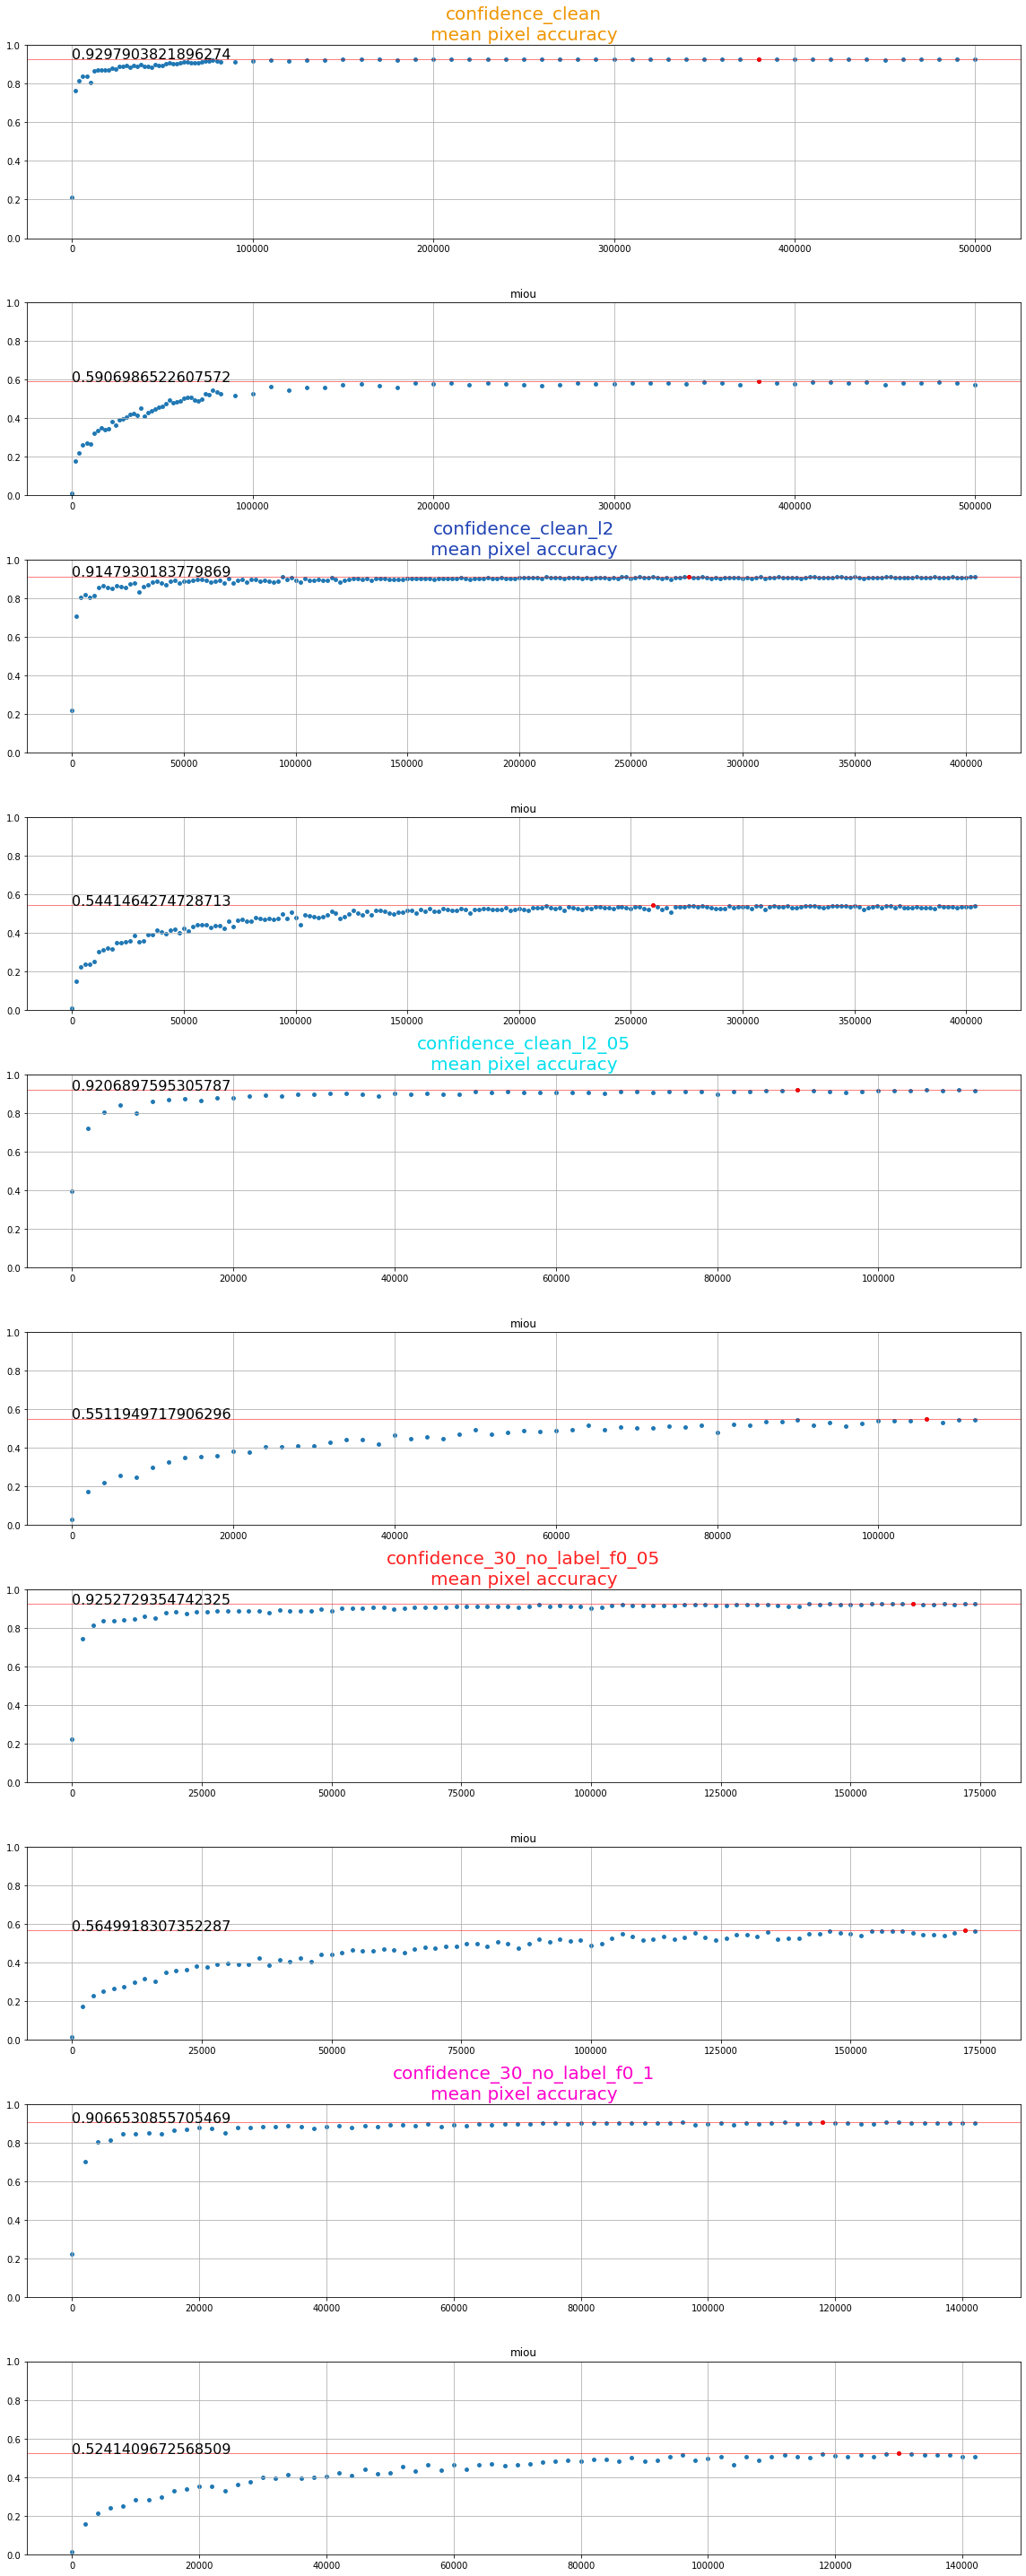

In [ ]:
while True:
    load_and_plot(load_path_list, name_list)